# Import Libraries

In [1]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_percentage_error as mape
import numpy as np
from sklearn import tree
import matplotlib.pyplot as plt

# Import Data

In [2]:
data = pd.read_csv('Company_Data.csv')
data .head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No


# EDA and Visualtization

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sales        400 non-null    float64
 1   CompPrice    400 non-null    int64  
 2   Income       400 non-null    int64  
 3   Advertising  400 non-null    int64  
 4   Population   400 non-null    int64  
 5   Price        400 non-null    int64  
 6   ShelveLoc    400 non-null    object 
 7   Age          400 non-null    int64  
 8   Education    400 non-null    int64  
 9   Urban        400 non-null    object 
 10  US           400 non-null    object 
dtypes: float64(1), int64(7), object(3)
memory usage: 34.5+ KB


In [4]:
data.shape

(400, 11)

In [5]:
data.isna().sum()

Sales          0
CompPrice      0
Income         0
Advertising    0
Population     0
Price          0
ShelveLoc      0
Age            0
Education      0
Urban          0
US             0
dtype: int64

In [6]:
data.corr()

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education
Sales,1.000000,0.064079,0.151951,0.269507,0.050471,-0.444951,-0.231815,-0.051955
CompPrice,0.064079,1.000000,-0.080653,-0.024199,-0.094707,0.584848,-0.100239,0.025197
Income,0.151951,-0.080653,1.000000,0.058995,-0.007877,-0.056698,-0.004670,-0.056855
Advertising,0.269507,-0.024199,0.058995,1.000000,0.265652,0.044537,-0.004557,-0.033594
Population,0.050471,-0.094707,-0.007877,0.265652,1.000000,-0.012144,-0.042663,-0.106378
Price,-0.444951,0.584848,-0.056698,0.044537,-0.012144,1.000000,-0.102177,0.011747
Age,-0.231815,-0.100239,-0.004670,-0.004557,-0.042663,-0.102177,1.000000,0.006488
Education,-0.051955,0.025197,-0.056855,-0.033594,-0.106378,0.011747,0.006488,1.000000


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sales        400 non-null    float64
 1   CompPrice    400 non-null    int64  
 2   Income       400 non-null    int64  
 3   Advertising  400 non-null    int64  
 4   Population   400 non-null    int64  
 5   Price        400 non-null    int64  
 6   ShelveLoc    400 non-null    object 
 7   Age          400 non-null    int64  
 8   Education    400 non-null    int64  
 9   Urban        400 non-null    object 
 10  US           400 non-null    object 
dtypes: float64(1), int64(7), object(3)
memory usage: 34.5+ KB


# Pre-Processing

In [8]:
lblen = LabelEncoder()
data["ShelveLoc"]= lblen.fit_transform(data["ShelveLoc"])
data["Urban"]= lblen.fit_transform(data["Urban"])
data["US"]= lblen.fit_transform(data["US"])
data.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,0,42,17,1,1
1,11.22,111,48,16,260,83,1,65,10,1,1
2,10.06,113,35,10,269,80,2,59,12,1,1
3,7.40,117,100,4,466,97,2,55,14,1,1
4,4.15,141,64,3,340,128,0,38,13,1,0


# Normalization function 

In [9]:
x=data.iloc[:,1:10]
y=data.iloc[:,10]

In [22]:
x

,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban
0,138,73,11,276,120,0,42,17,1
1,111,48,16,260,83,1,65,10,1
2,113,35,10,269,80,2,59,12,1
3,117,100,4,466,97,2,55,14,1
4,141,64,3,340,128,0,38,13,1
...,...,...,...,...,...,...,...,...,...
395,138,108,17,203,128,1,33,14,1
396,139,23,3,37,120,2,55,11,0
397,162,26,12,368,159,2,40,18,1
398,100,79,7,284,95,0,50,12,1


In [23]:
y

0      1
1      1
2      1
3      1
4      0
      ..
395    1
396    1
397    1
398    1
399    1
Name: US, Length: 400, dtype: int32

In [10]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,shuffle=True)

# Model Building

In [11]:
model = DecisionTreeRegressor(max_depth=5)
model.fit(x_train,y_train)

DecisionTreeRegressor(max_depth=5)

In [12]:
y_pred=model.predict(x_test)

In [13]:
mape(y_test,y_pred)

369386629100678.94

In [14]:
np.mean(abs(y_test-y_pred)/y_test)

inf

In [15]:
abs(y_test-y_pred)/y_test
data.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,0,42,17,1,1
1,11.22,111,48,16,260,83,1,65,10,1,1
2,10.06,113,35,10,269,80,2,59,12,1,1
3,7.40,117,100,4,466,97,2,55,14,1,1
4,4.15,141,64,3,340,128,0,38,13,1,0


[Text(199.2857142857143, 498.3, 'Advertising <= 0.5\nmse = 0.23\nsamples = 280\nvalue = 0.643'),
 Text(79.71428571428572, 407.70000000000005, 'CompPrice <= 160.5\nmse = 0.112\nsamples = 101\nvalue = 0.129'),
 Text(53.142857142857146, 317.1, 'Income <= 42.5\nmse = 0.106\nsamples = 100\nvalue = 0.12'),
 Text(26.571428571428573, 226.5, 'mse = 0.0\nsamples = 26\nvalue = 0.0'),
 Text(79.71428571428572, 226.5, 'Income <= 43.5\nmse = 0.136\nsamples = 74\nvalue = 0.162'),
 Text(53.142857142857146, 135.89999999999998, 'mse = 0.0\nsamples = 1\nvalue = 1.0'),
 Text(106.28571428571429, 135.89999999999998, 'ShelveLoc <= 0.5\nmse = 0.128\nsamples = 73\nvalue = 0.151'),
 Text(79.71428571428572, 45.299999999999955, 'mse = 0.208\nsamples = 17\nvalue = 0.294'),
 Text(132.85714285714286, 45.299999999999955, 'mse = 0.096\nsamples = 56\nvalue = 0.107'),
 Text(106.28571428571429, 317.1, 'mse = 0.0\nsamples = 1\nvalue = 1.0'),
 Text(318.8571428571429, 407.70000000000005, 'Advertising <= 4.5\nmse = 0.063\nsam

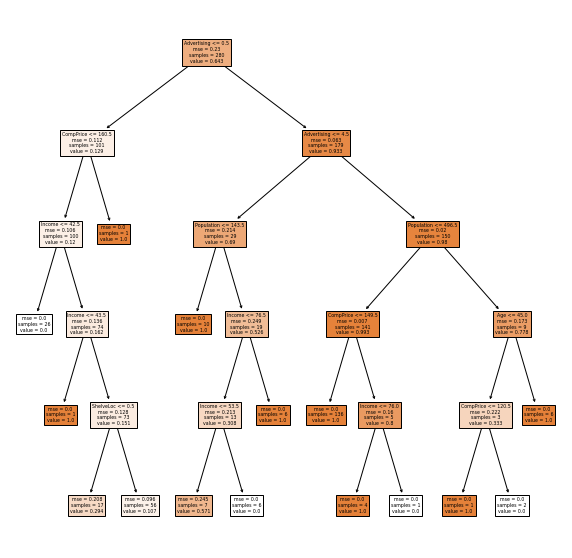

In [16]:
plt.figure(figsize=(10,10))
fn=['CompPrice','Income','Advertising','Population','Price','ShelveLoc','Age','Education','Urban','US']
tree.plot_tree(model,feature_names=fn,filled=True)

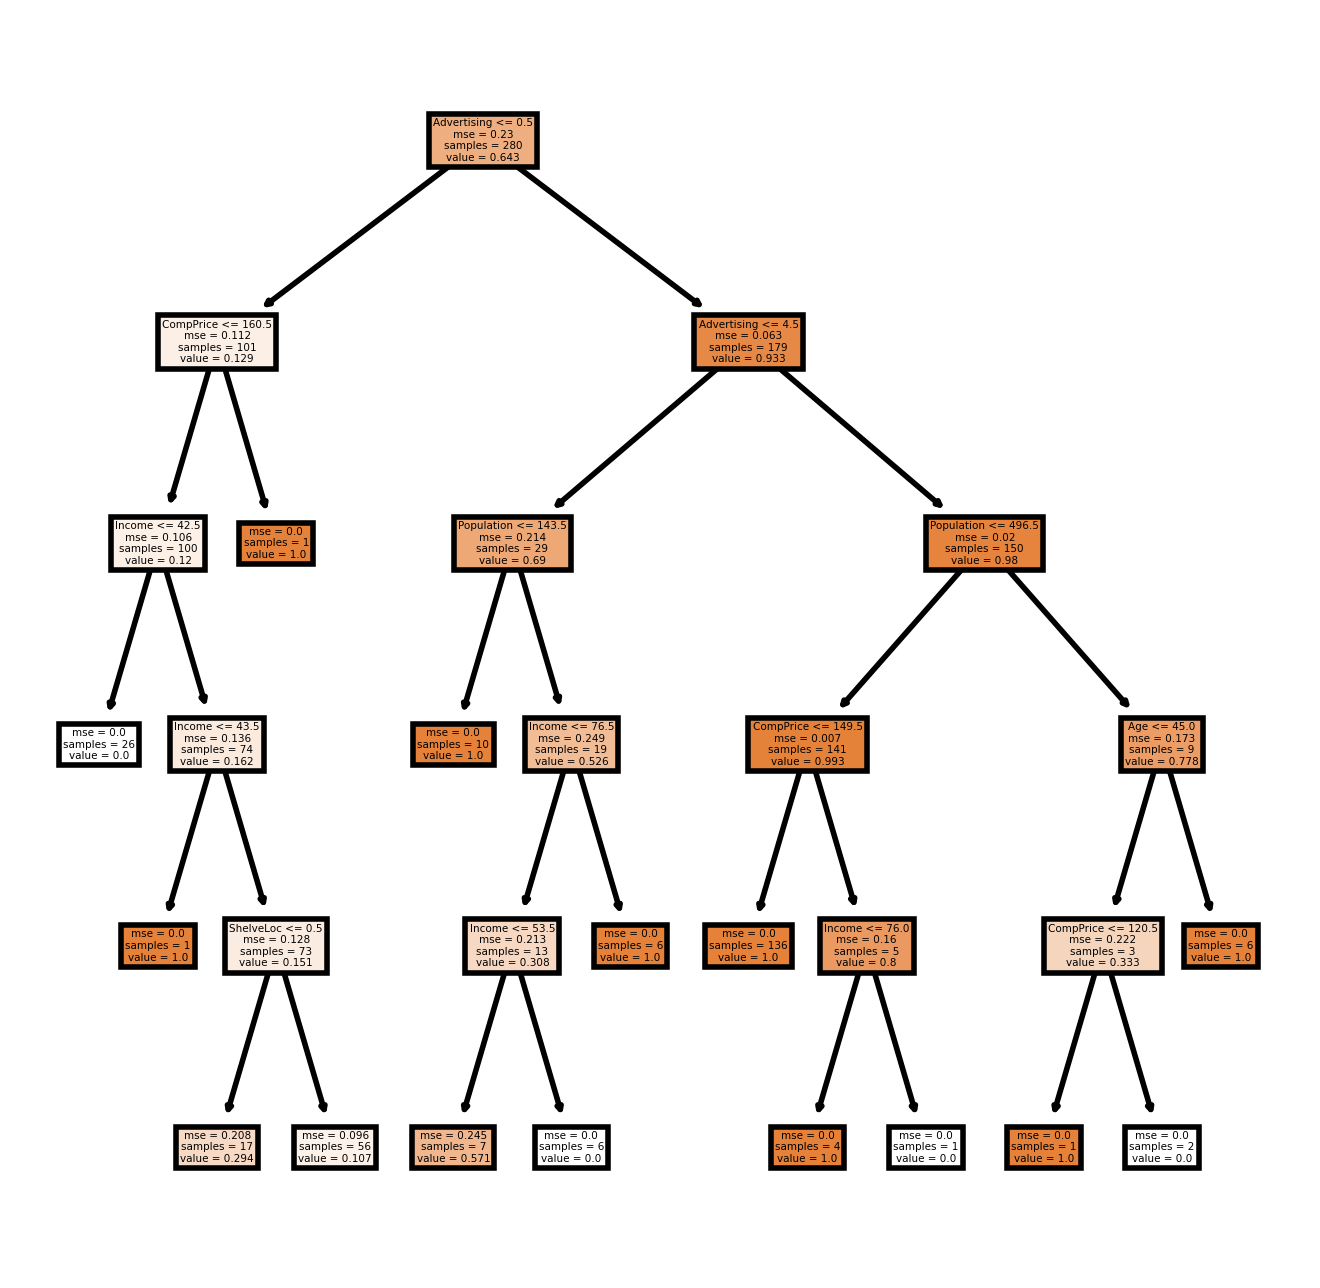

In [17]:
fn=['CompPrice','Income','Advertising','Population','Price', 'ShelveLoc', 'Age', 'Education','Urban', 'US']
cn=['high','low']
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=400)
tree.plot_tree(model,
               feature_names = fn, 
               class_names=cn,
               filled = True);

#Predicting on test data


In [18]:
preds = model.predict(x_test)
pd.Series(preds).value_counts()

1.000000    72
0.107143    19
0.000000    15
0.294118    12
0.571429     2
dtype: int64

In [19]:
preds

array([0.57142857, 1.        , 1.        , 1.        , 1.        ,
       1.        , 0.        , 1.        , 1.        , 1.        ,
       0.29411765, 0.10714286, 1.        , 1.        , 0.10714286,
       0.29411765, 0.29411765, 0.        , 1.        , 1.        ,
       0.10714286, 0.29411765, 0.10714286, 0.        , 1.        ,
       1.        , 1.        , 0.        , 1.        , 1.        ,
       1.        , 0.        , 0.29411765, 1.        , 0.29411765,
       1.        , 0.        , 1.        , 1.        , 1.        ,
       1.        , 0.29411765, 0.        , 0.        , 1.        ,
       0.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 0.10714286, 1.        , 1.        , 1.        ,
       1.        , 0.29411765, 0.10714286, 0.10714286, 1.        ,
       0.10714286, 0.29411765, 0.10714286, 1.        , 1.        ,
       0.29411765, 0.10714286, 1.        , 1.        , 1.        ,
       0.57142857, 1.        , 1.        , 1.        , 1.     

In [20]:
pd.crosstab(y_test,preds)

col_0,0.000000,0.107143,0.294118,0.571429,1.000000
US,,,,,
0,11,15,11,0,5
1,4,4,1,2,67


Accuracy

In [21]:
np.mean(preds==y_test)

0.65